In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import tree
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA


/Users/jordankesner/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [15]:
df = pd.read_csv('countvectorized_dataframes/count_vectorized_dataset.csv')

## Naive Bayes

In [16]:
df

,aaa,aaaacccdfghi,aaib,aam,aap,aapi,aarhus,aaron,aas,aau,...,zuckermusk,zuckermuskian,zuckerschmuck,zucks,zumbi,zurdo,zvakada,zygote,zygotes,Label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Free Speech
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Free Speech
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Mixed Opinions
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Hate Speech Regulation
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Hate Speech Regulation
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
821,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Free Speech
822,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Free Speech
823,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Free Speech
824,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Free Speech


In [17]:
df["Label"].value_counts()

Label
Hate Speech Regulation    254
Mixed Opinions            219
Free Speech               203
Neutral Discussion        150
Name: count, dtype: int64

In [18]:
label_mapping = {
    "Free Speech": "FS",
    "Hate Speech Regulation": "HS",
    "Mixed Opinions": "MO",
    "Neutral Discussion": "ND"
}

# Apply mapping
df["Label"] = df["Label"].replace(label_mapping)

In [11]:
train,test = train_test_split(df, test_size=0.2, random_state=42)
X_train = train.drop(columns=['Label'])
y_train = train['Label']
X_test = test.drop(columns=['Label'])
y_test = test['Label']
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((660, 28745), (660,), (166, 28745), (166,))

In [20]:
train.head()

,aaa,aaaacccdfghi,aaib,aam,aap,aapi,aarhus,aaron,aas,aau,...,zuckermusk,zuckermuskian,zuckerschmuck,zucks,zumbi,zurdo,zvakada,zygote,zygotes,Label
787,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,MO
456,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,HS
342,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,FS
299,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,FS
383,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,HS


In [21]:
test.head()

,aaa,aaaacccdfghi,aaib,aam,aap,aapi,aarhus,aaron,aas,aau,...,zuckermusk,zuckermuskian,zuckerschmuck,zucks,zumbi,zurdo,zvakada,zygote,zygotes,Label
648,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,MO
174,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ND
67,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,FS
168,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ND
275,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,FS


In [12]:
multi_nb = MultinomialNB()
multi_nb.fit(X_train, y_train)

MultinomialNB()

              precision    recall  f1-score   support

          FS       0.57      0.72      0.64        43
          HS       0.67      0.64      0.65        50
          MO       0.60      0.76      0.67        41
          ND       0.42      0.16      0.23        32

    accuracy                           0.60       166
   macro avg       0.56      0.57      0.55       166
weighted avg       0.58      0.60      0.57       166

Accuracy: 0.5963855421686747


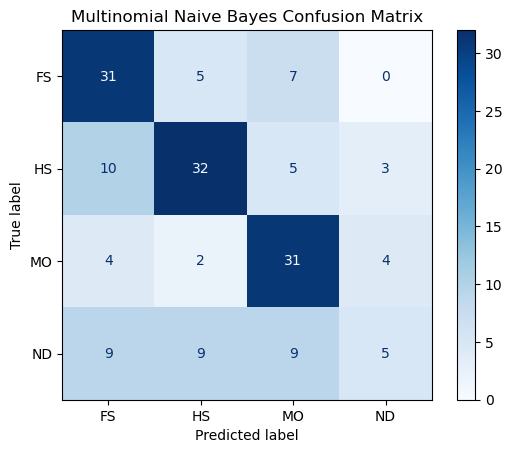

In [13]:
predictions = multi_nb.predict(X_test)
print(classification_report(y_test, predictions))
print("Accuracy:", accuracy_score(y_test, predictions))
cm = confusion_matrix(y_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=multi_nb.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Multinomial Naive Bayes Confusion Matrix")
plt.show()

## Decision Trees

              precision    recall  f1-score   support

          FS       0.67      0.72      0.70        43
          HS       0.66      0.80      0.72        50
          MO       0.79      0.63      0.70        41
          ND       0.50      0.41      0.45        32

    accuracy                           0.66       166
   macro avg       0.65      0.64      0.64       166
weighted avg       0.66      0.66      0.66       166

Accuracy: 0.6626506024096386


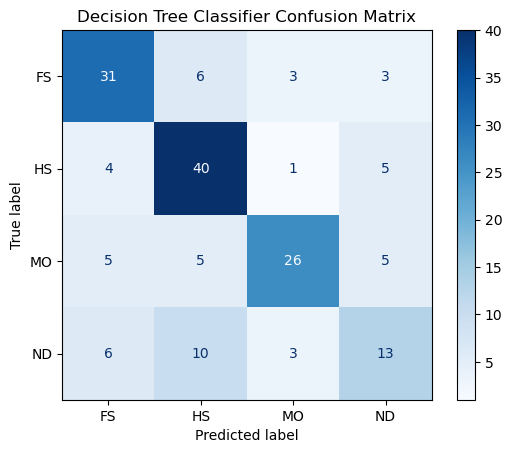

In [22]:
dt1 = DecisionTreeClassifier(random_state=42)
dt1.fit(X_train, y_train)
predictions = dt1.predict(X_test)
print(classification_report(y_test, predictions))
print("Accuracy:", accuracy_score(y_test, predictions))
cm = confusion_matrix(y_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dt1.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Decision Tree Classifier Confusion Matrix")
plt.show()

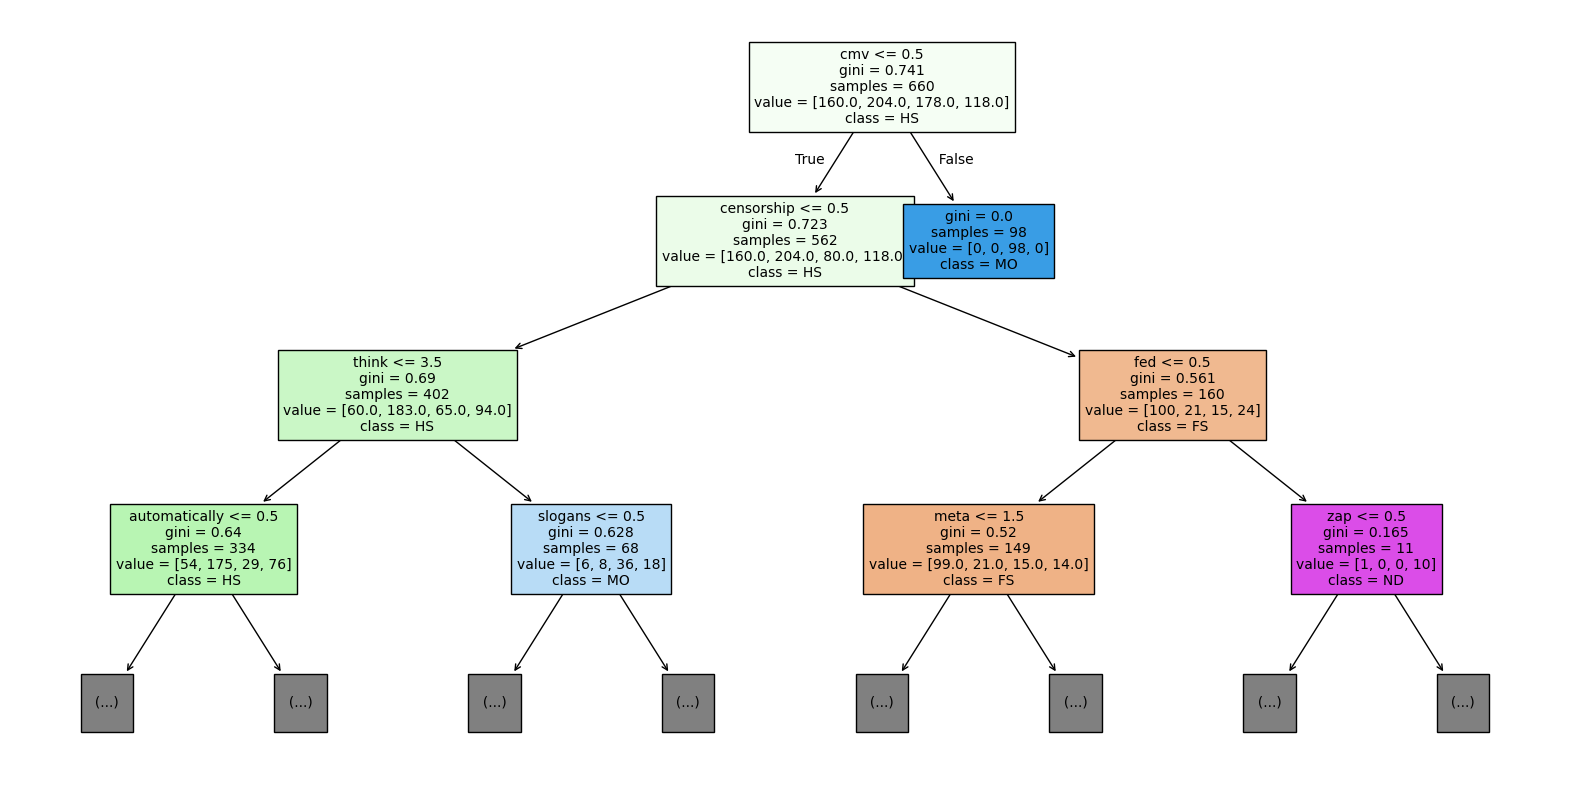

In [29]:
plt.figure(figsize=(20, 10))
tree.plot_tree(dt1, 
               max_depth=3,  # visualize only the top 3 levels
               filled=True, 
               fontsize=10, 
               feature_names=list(X_train.columns), 
               class_names=dt1.classes_)
plt.show()


In [27]:
from sklearn.tree import export_text

# Export the decision tree as text
tree_rules = export_text(dt1, feature_names=list(X_train.columns))
print(tree_rules)

|--- cmv <= 0.50
|   |--- censorship <= 0.50
|   |   |--- think <= 3.50
|   |   |   |--- automatically <= 0.50
|   |   |   |   |--- hate <= 0.50
|   |   |   |   |   |--- speech <= 0.50
|   |   |   |   |   |   |--- impact <= 0.50
|   |   |   |   |   |   |   |--- content <= 0.50
|   |   |   |   |   |   |   |   |--- easy <= 0.50
|   |   |   |   |   |   |   |   |   |--- debate <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- entirely <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 9
|   |   |   |   |   |   |   |   |   |   |--- entirely >  0.50
|   |   |   |   |   |   |   |   |   |   |   |--- class: FS
|   |   |   |   |   |   |   |   |   |--- debate >  0.50
|   |   |   |   |   |   |   |   |   |   |--- class: FS
|   |   |   |   |   |   |   |   |--- easy >  0.50
|   |   |   |   |   |   |   |   |   |--- class: MO
|   |   |   |   |   |   |   |--- content >  0.50
|   |   |   |   |   |   |   |   |--- rules <= 4.00
|   |   |   |   |   |   |   |   |   |--- law

              precision    recall  f1-score   support

          FS       0.66      0.58      0.62        43
          HS       0.47      0.80      0.59        50
          MO       0.91      0.73      0.81        41
          ND       0.56      0.16      0.24        32

    accuracy                           0.60       166
   macro avg       0.65      0.57      0.57       166
weighted avg       0.64      0.60      0.58       166

Accuracy: 0.6024096385542169


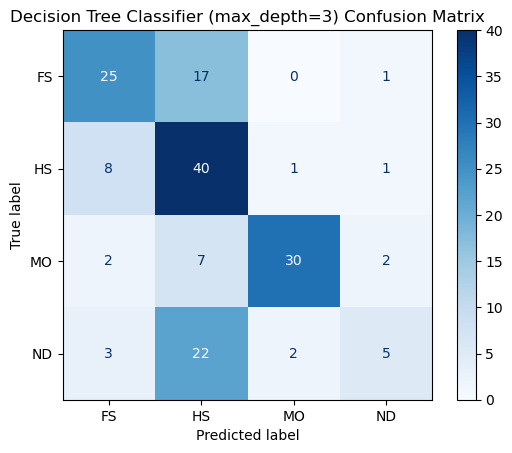

In [ ]:
dt2 = DecisionTreeClassifier(random_state=42, max_depth=3)
dt2.fit(X_train, y_train)
predictions = dt2.predict(X_test)
print(classification_report(y_test, predictions))
print("Accuracy:", accuracy_score(y_test, predictions))
cm = confusion_matrix(y_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dt2.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Decision Tree Classifier (max_depth=3) Confusion Matrix")
plt.show()



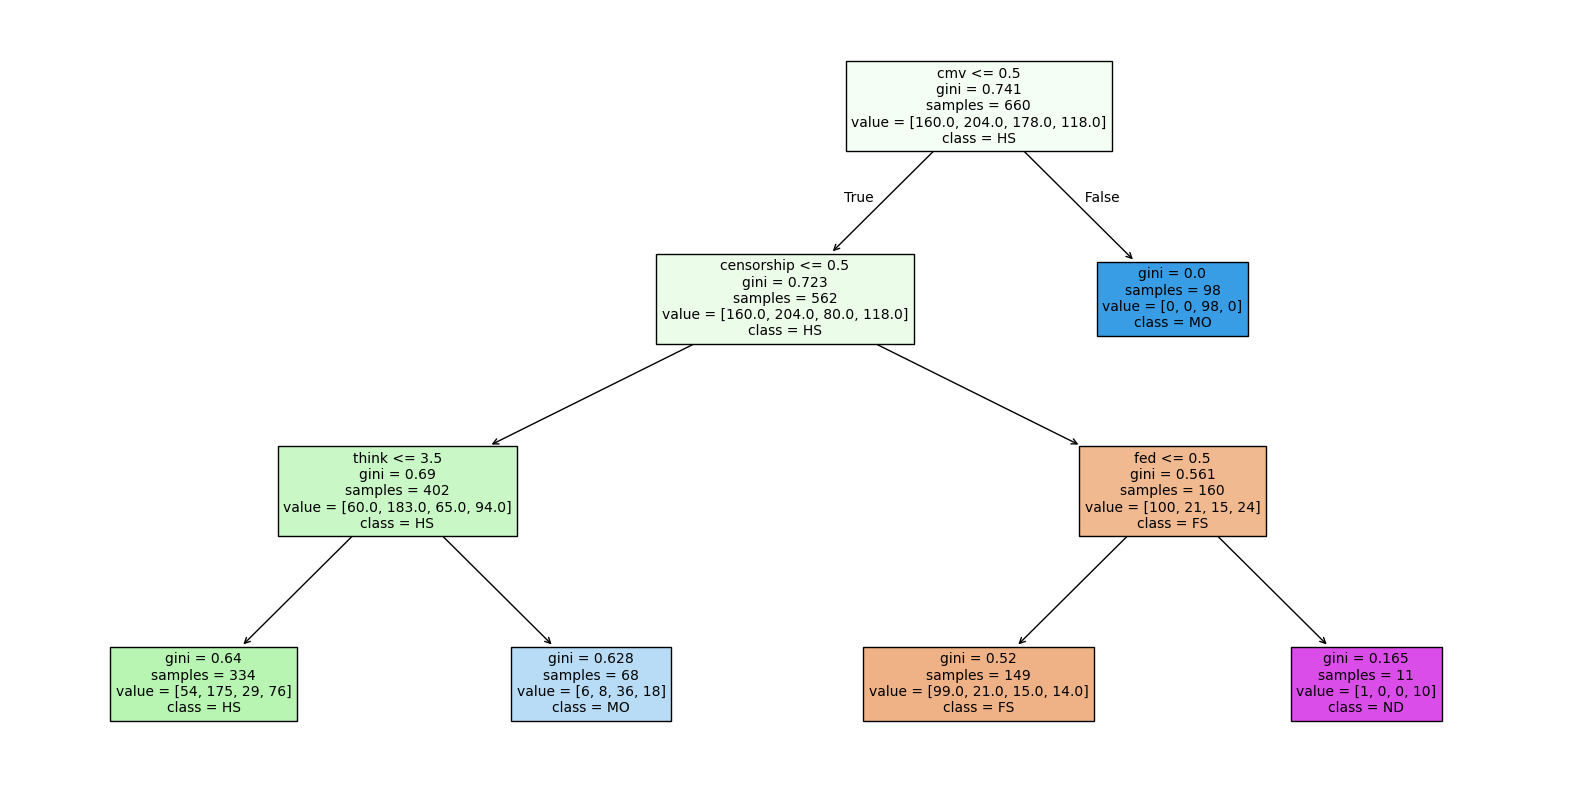

In [30]:
plt.figure(figsize=(20, 10))
tree.plot_tree(dt2, 
               max_depth=3,  # visualize only the top 3 levels
               filled=True, 
               fontsize=10, 
               feature_names=list(X_train.columns), 
               class_names=dt2.classes_)
plt.show()

              precision    recall  f1-score   support

          FS       0.65      0.70      0.67        43
          HS       0.65      0.70      0.67        50
          MO       0.77      0.73      0.75        41
          ND       0.52      0.44      0.47        32

    accuracy                           0.66       166
   macro avg       0.65      0.64      0.64       166
weighted avg       0.65      0.66      0.65       166

Accuracy: 0.6566265060240963


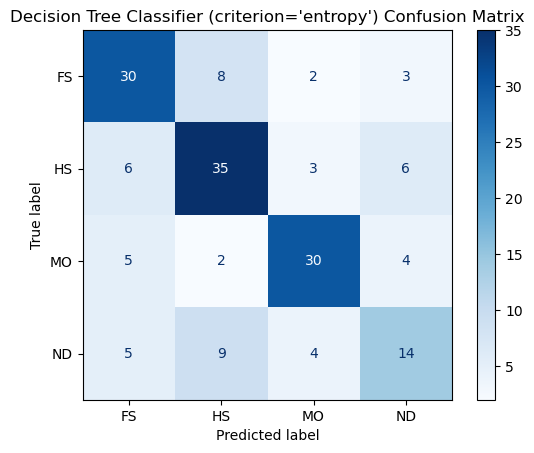

In [25]:
dt3 = DecisionTreeClassifier(random_state=42, criterion='entropy')
dt3.fit(X_train, y_train)
predictions = dt3.predict(X_test)
print(classification_report(y_test, predictions))
print("Accuracy:", accuracy_score(y_test, predictions))
cm = confusion_matrix(y_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dt3.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Decision Tree Classifier (criterion='entropy') Confusion Matrix")
plt.show()



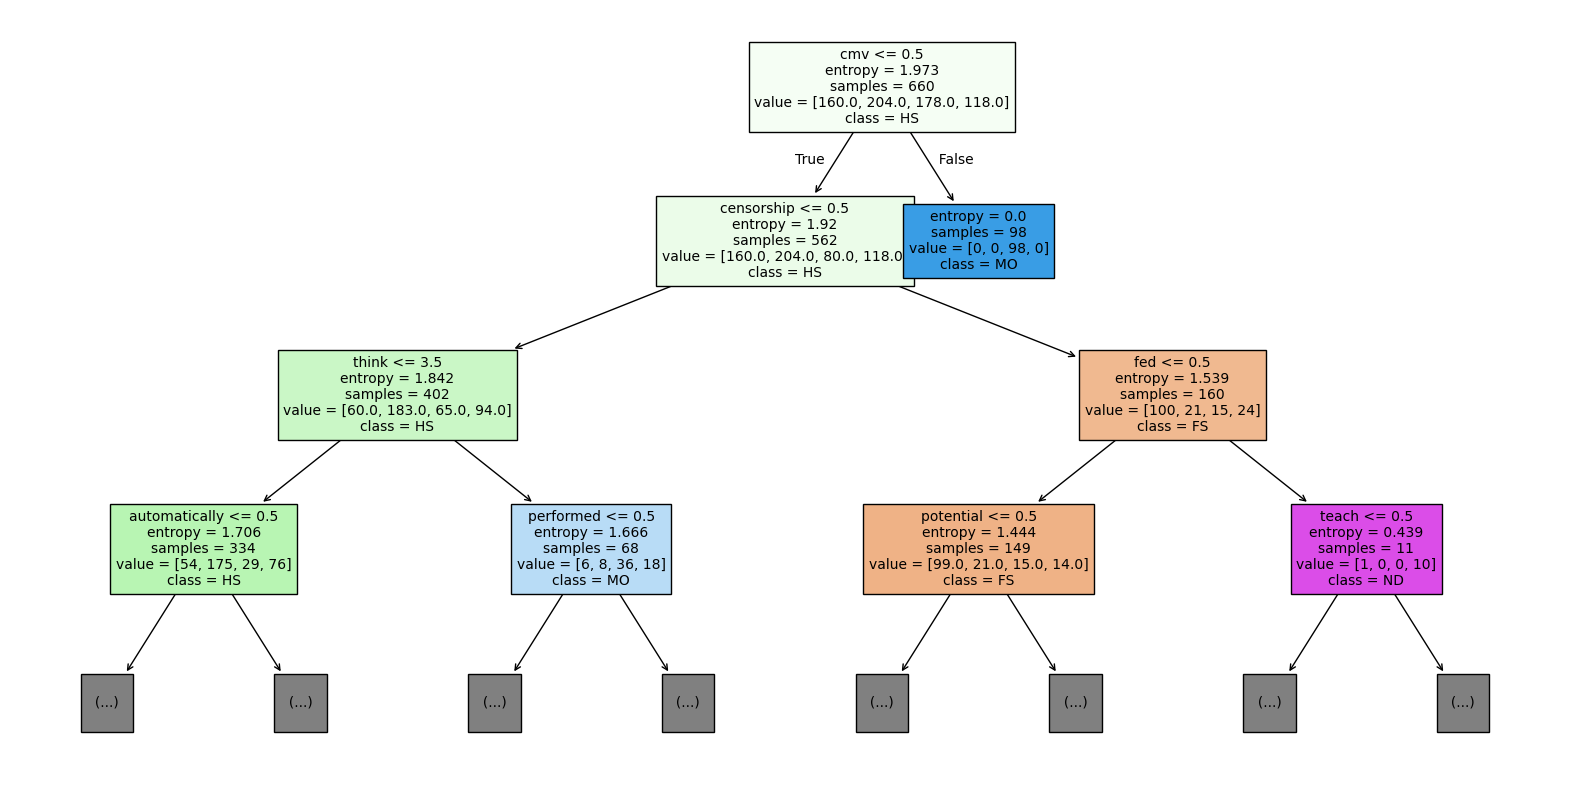

In [31]:
plt.figure(figsize=(20, 10))
tree.plot_tree(dt3, 
               max_depth=3,  # visualize only the top 3 levels
               filled=True, 
               fontsize=10, 
               feature_names=list(X_train.columns), 
               class_names=dt3.classes_)
plt.show()

## Support Vector Machine

              precision    recall  f1-score   support

          FS       0.61      0.63      0.62        43
          HS       0.58      0.68      0.62        50
          MO       0.56      0.37      0.44        41
          ND       0.31      0.34      0.32        32

    accuracy                           0.52       166
   macro avg       0.51      0.50      0.50       166
weighted avg       0.53      0.52      0.52       166

Accuracy: 0.5240963855421686


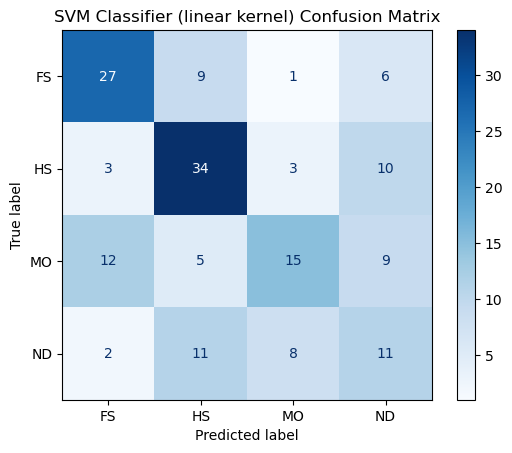

In [35]:
svm1 = SVC(kernel='linear', random_state=42)
svm1.fit(X_train, y_train)
predictions = svm1.predict(X_test)
print(classification_report(y_test, predictions))
print("Accuracy:", accuracy_score(y_test, predictions))
cm = confusion_matrix(y_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svm1.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("SVM Classifier (linear kernel) Confusion Matrix")
plt.show()

              precision    recall  f1-score   support

          FS       0.71      0.51      0.59        43
          HS       0.48      0.92      0.63        50
          MO       0.79      0.76      0.78        41
          ND       1.00      0.03      0.06        32

    accuracy                           0.60       166
   macro avg       0.75      0.55      0.52       166
weighted avg       0.72      0.60      0.55       166

Accuracy: 0.6024096385542169


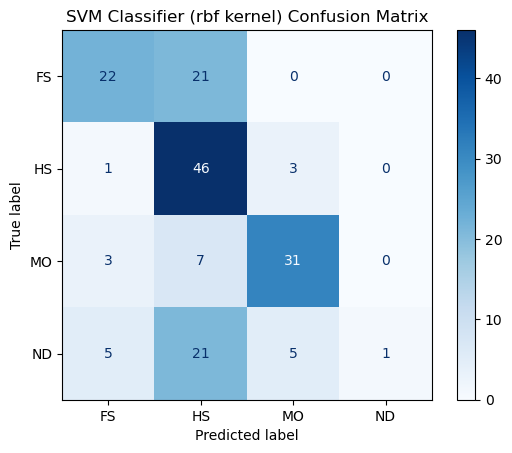

In [36]:
svm2 = SVC(kernel='rbf', random_state=42)
svm2.fit(X_train, y_train)
predictions = svm2.predict(X_test)
print(classification_report(y_test, predictions))
print("Accuracy:", accuracy_score(y_test, predictions))
cm = confusion_matrix(y_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svm2.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("SVM Classifier (rbf kernel) Confusion Matrix")
plt.show()



              precision    recall  f1-score   support

          FS       0.20      0.02      0.04        43
          HS       0.32      0.94      0.48        50
          MO       0.86      0.29      0.44        41
          ND       0.00      0.00      0.00        32

    accuracy                           0.36       166
   macro avg       0.34      0.31      0.24       166
weighted avg       0.36      0.36      0.26       166

Accuracy: 0.3614457831325301


/Users/jordankesner/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/jordankesner/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/jordankesner/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(r

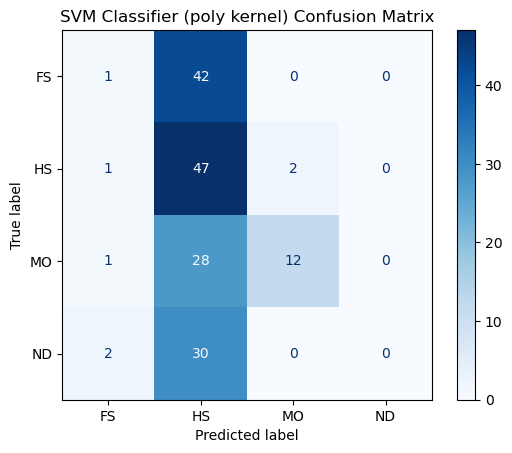

In [39]:
svm3 = SVC(kernel='poly', random_state=42, degree=2,C=1.0)
svm3.fit(X_train, y_train)
predictions = svm3.predict(X_test)
print(classification_report(y_test, predictions))
print("Accuracy:", accuracy_score(y_test, predictions))
cm = confusion_matrix(y_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svm3.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("SVM Classifier (poly kernel) Confusion Matrix")
plt.show()

In [40]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svm3 = SVC(kernel='poly', degree=2, C=1.0, random_state=42)
svm3.fit(X_train_scaled, y_train)
predictions = svm3.predict(X_test_scaled)

              precision    recall  f1-score   support

          FS       1.00      0.02      0.05        43
          HS       0.31      1.00      0.47        50
          MO       1.00      0.05      0.09        41
          ND       0.00      0.00      0.00        32

    accuracy                           0.32       166
   macro avg       0.58      0.27      0.15       166
weighted avg       0.60      0.32      0.18       166

Accuracy: 0.3192771084337349


/Users/jordankesner/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/jordankesner/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/jordankesner/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(r

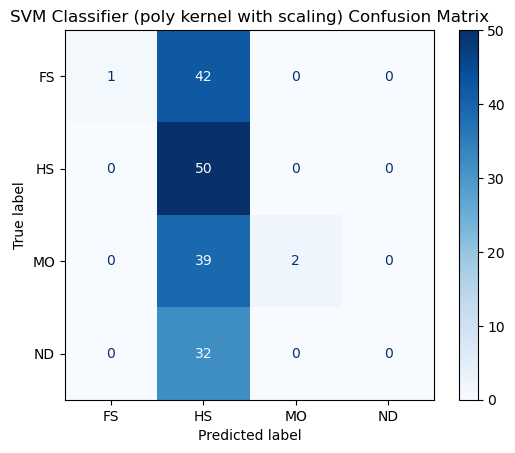

In [41]:
print(classification_report(y_test, predictions))
print("Accuracy:", accuracy_score(y_test, predictions))
cm = confusion_matrix(y_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svm3.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("SVM Classifier (poly kernel with scaling) Confusion Matrix")
plt.show()

In [34]:
df

,aaa,aaaacccdfghi,aaib,aam,aap,aapi,aarhus,aaron,aas,aau,...,zuckermusk,zuckermuskian,zuckerschmuck,zucks,zumbi,zurdo,zvakada,zygote,zygotes,Label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,FS
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,FS
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,MO
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,HS
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,HS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
821,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,FS
822,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,FS
823,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,FS
824,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,FS


In [48]:
sentiment_map = {
    "FS": "Opinionated",
    "HS": "Opinionated",
    "MO": "Neutral",
    "ND": "Neutral"
}

# Apply mapping
df["Sentiment"] = df["Label"].map(sentiment_map)

In [49]:
df

,aaa,aaaacccdfghi,aaib,aam,aap,aapi,aarhus,aaron,aas,aau,...,zuckermuskian,zuckerschmuck,zucks,zumbi,zurdo,zvakada,zygote,zygotes,Label,Sentiment
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,FS,Opinionated
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,FS,Opinionated
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,MO,Neutral
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,HS,Opinionated
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,HS,Opinionated
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
821,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,FS,Opinionated
822,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,FS,Opinionated
823,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,FS,Opinionated
824,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,FS,Opinionated


In [50]:
from sklearn.model_selection import train_test_split

# Step 1: Define feature matrix X and target vector y
X = df.drop(columns=["Label", "Sentiment"])  # drop non-feature columns
y = df["Sentiment"]  # binary target: 'Opinionated' or 'Neutral'

# Step 2: Train/test split (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Optional: Confirm the shape
print("Training samples:", X_train.shape[0])
print("Testing samples:", X_test.shape[0])


Training samples: 660
Testing samples: 166


Confusion Matrix:
[[52 22]
 [16 76]]

Classification Report:
              precision    recall  f1-score   support

     Neutral       0.76      0.70      0.73        74
 Opinionated       0.78      0.83      0.80        92

    accuracy                           0.77       166
   macro avg       0.77      0.76      0.77       166
weighted avg       0.77      0.77      0.77       166


Accuracy: 0.7710843373493976


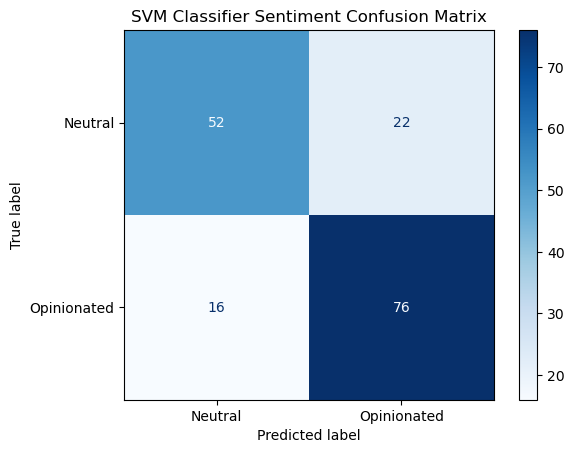

In [51]:
svm_sentiment = SVC(kernel='linear', C=1, random_state=42)
svm_sentiment.fit(X_train, y_train)

# Predict
y_pred = svm_sentiment.predict(X_test)

# Evaluate
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nAccuracy:", accuracy_score(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svm_sentiment.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("SVM Classifier Sentiment Confusion Matrix")
plt.show()